

---



In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, make_scorer
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
import xgboost as xgb
import lightgbm as lgb
from scipy.stats.mstats import winsorize
from sklearn.tree import DecisionTreeClassifier

# preprocessing_v1
- winsorize 시각화 부분은 실행 시간이 길어서 임시로 주석 처리했습니다

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from google.colab import drive
drive.mount('/content/drive')

# 작업 디렉토리 변경
import os
print(os.getcwd(), end=' -> ')
os.chdir('/content/drive/MyDrive/PatternRecognition/project')
print(os.getcwd())

# CSV 파일 불러오기
df = pd.read_csv('train.csv')
df.head()

Mounted at /content/drive
/content -> /content/drive/MyDrive/PatternRecognition/project


,id,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,data_channel,weekday,shares,y
0,17335,9.0,409.0,0.501326,1.0,0.587361,23.0,2.0,11.0,0.0,...,-0.1875,-0.1,0.50,0.500,0.00,0.500,Lifestyle,NaN,801,0
1,21242,10.0,317.0,0.725086,1.0,0.830097,6.0,3.0,NaN,21.0,...,-0.6000,NaN,0.00,0.000,0.50,0.000,Lifestyle,Tuesday,426,0
2,9448,11.0,447.0,0.584091,1.0,0.730104,NaN,1.0,1.0,1.0,...,-0.5000,-0.1,0.75,0.125,0.25,0.125,World,Friday,2400,1
3,36797,13.0,143.0,0.638298,NaN,0.787500,3.0,2.0,NaN,0.0,...,0.0000,0.0,1.00,NaN,0.50,0.500,Social Media,NaN,1100,0
4,29504,17.0,576.0,0.524412,1.0,0.714286,8.0,3.0,NaN,0.0,...,-1.0000,-0.1,0.00,0.000,0.50,0.000,World,Wednesday,1500,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22200 entries, 0 to 22199
Data columns (total 49 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            22200 non-null  int64  
 1   n_tokens_title                20000 non-null  float64
 2   n_tokens_content              20054 non-null  float64
 3   n_unique_tokens               19942 non-null  float64
 4   n_non_stop_words              20017 non-null  float64
 5   n_non_stop_unique_tokens      19944 non-null  float64
 6   num_hrefs                     19967 non-null  float64
 7   num_self_hrefs                19920 non-null  float64
 8   num_imgs                      19986 non-null  float64
 9   num_videos                    19906 non-null  float64
 10  average_token_length          19987 non-null  float64
 11  num_keywords                  19955 non-null  float64
 12  kw_min_min                    19984 non-null  float64
 13  k

In [5]:
df.describe()

,id,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,y
count,22200.000000,20000.000000,20054.000000,19942.000000,20017.000000,19944.000000,19967.000000,19920.000000,19986.000000,19906.000000,...,20033.000000,19916.000000,19926.000000,19997.000000,19928.000000,19967.000000,19934.000000,19951.000000,22200.000000,22200.000000
mean,19856.270045,10.387150,543.920614,0.530611,0.970175,0.672893,10.840337,3.303263,4.473431,1.248669,...,0.755952,-0.259972,-0.523223,-0.107647,0.284772,0.070169,0.342966,0.155305,3459.794865,0.495676
std,11469.556277,2.105585,460.694982,0.138709,0.170108,0.155004,11.024976,3.944523,8.092647,4.087507,...,0.248262,0.127974,0.289365,0.096059,0.327151,0.264686,0.188498,0.225603,12767.254516,0.499993
min,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,22.000000,0.000000
25%,9948.750000,9.000000,246.000000,0.471005,1.000000,0.626836,4.000000,1.000000,1.000000,0.000000,...,0.600000,-0.329167,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,948.000000,0.000000
50%,19931.000000,10.000000,409.000000,0.539683,1.000000,0.691228,7.000000,3.000000,1.000000,0.000000,...,0.800000,-0.253718,-0.500000,-0.100000,0.144444,0.000000,0.500000,0.000000,1400.000000,0.000000
75%,29780.250000,12.000000,715.750000,0.609865,1.000000,0.754545,14.000000,4.000000,4.000000,1.000000,...,1.000000,-0.187500,-0.300000,-0.050000,0.500000,0.138600,0.500000,0.250000,2800.000000,1.000000
max,39644.000000,19.000000,7413.000000,1.000000,1.000000,1.000000,186.000000,116.000000,108.000000,91.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000,1.000000


## 데이터 전처리

(0.0, 20000.0)

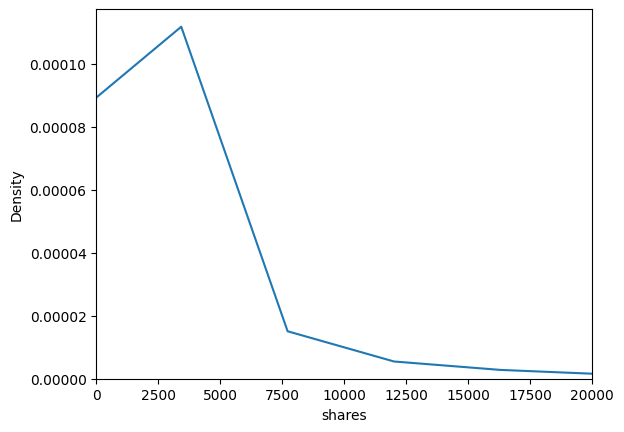

In [6]:
# 공유 수 분포 그래프
sns.kdeplot(df['shares'])
plt.xlim(0, 20000)

In [7]:
# 이상치 제거 비율에 따른 수치 통계

from scipy.stats import skew, kurtosis

quantiles = [1.0, 0.998, 0.995, 0.99, 0.98, 0.975]
summary_list = []

for q in quantiles:
    threshold = df['shares'].quantile(q)
    temp = df[df['shares'] <= threshold]['shares']

    summary = {
        'quantile': q,
        'count': temp.count(),
        'mean': temp.mean(),
        'std': temp.std(),
        'skew': skew(temp),
        'kurtosis': kurtosis(temp),
        'min': temp.min(),
        'max': temp.max()
    }

    summary_list.append(summary)

summary_df = pd.DataFrame(summary_list)
print(summary_df)


   quantile  count         mean           std       skew     kurtosis  min  \
0     1.000  22200  3459.794865  12767.254516  34.564296  1777.645277   22   
1     0.998  22155  3075.768269   5730.182933   6.628787    59.428030   22   
2     0.995  22090  2891.559439   4596.721530   5.102655    34.846652   22   
3     0.990  21978  2694.451224   3655.563807   3.813214    18.020655   22   
4     0.980  21760  2468.876333   2873.139893   3.020613    10.499472   22   
5     0.975  21648  2384.638258   2629.522184   2.816273     8.936662   22   

      max  
0  843300  
1   86200  
2   53100  
3   32100  
4   20400  
5   17300  


quantile = 0.98 에서 mean, std, skew(첨도), kurtosis(왜도)의 급격한 변화가 관찰된다. 따라서 shares가 상위 2%에 해당하는 데이터를 이상치로 간주하고 제거한다.

(0.0, 8500.0)

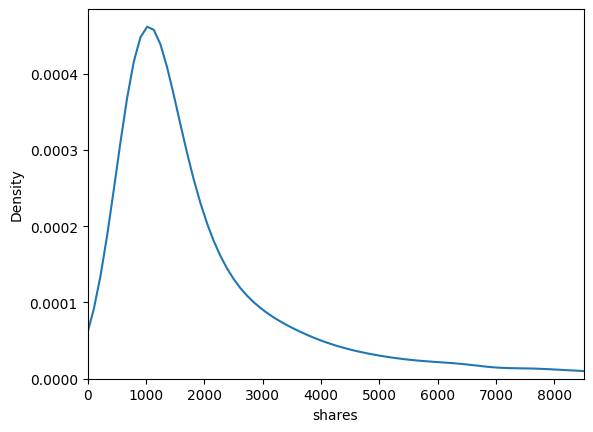

In [8]:
threshold = df['shares'].quantile(0.98)
df = df[df['shares'] <= threshold]

sns.kdeplot(df['shares'])
plt.xlim(0, 8500)

In [9]:
# 가장 많이 등장한 값이 전체에서 차지하는 비율 top 10
top_ratio_dict = {}

for col in df.columns:
    most_common = df[col].value_counts(dropna=False).iloc[0]
    total = len(df)
    ratio = most_common / total
    top_ratio_dict[col] = ratio

top_10 = sorted(top_ratio_dict.items(), key=lambda x: x[1], reverse=True)[:10]

for col, ratio in top_10:
    print(f"{col}: {ratio:.2%}")

kw_max_max: 68.35%
num_videos: 56.65%
kw_min_min: 51.76%
y: 51.45%
abs_title_subjectivity: 46.69%
title_sentiment_polarity: 45.63%
abs_title_sentiment_polarity: 45.57%
num_imgs: 41.48%
title_subjectivity: 40.89%
kw_min_avg: 38.98%


In [10]:
# 중복 값이 많은 변수들을 자세히 살펴보자
df['kw_min_min'].value_counts(dropna=False).head(5)

,count
kw_min_min,
-1.0,11263
4.0,5955
217.0,2323
NaN,2167
0.0,34


In [11]:
df['kw_max_max'].value_counts(dropna=False).head(5)

,count
kw_max_max,
843300.0,14873
NaN,2193
690400.0,1982
617900.0,1115
69100.0,645


In [12]:
df['n_non_stop_words_rounded'] = df['n_non_stop_words'].round(3)  # 소수 셋째 자리까지 반올림
df['n_non_stop_words_rounded'].value_counts(dropna=False)

,count
n_non_stop_words_rounded,
1.0,19041
NaN,2139
0.0,580


In [13]:
# 많은 값들이 같은 값을 가지므로 삭제한다
df.drop(columns=['kw_min_min'], axis=1, inplace=True)
df.drop(columns=['kw_max_max'], axis=1, inplace=True)
df.drop(columns=['n_non_stop_words'], axis=1, inplace=True)
df.drop(columns=['n_non_stop_words_rounded'], axis=1, inplace=True)

In [14]:
# 'id'는 각 샘플마다 고유한 값을 가진다. 학습에 사용할 값이 아니므로 삭제한다
df.drop(columns=['id'], axis=1, inplace=True)

In [15]:
# # Scatter plot

X = df.drop(columns=['shares', 'y'])
X = X.select_dtypes(include=['number']) # 숫자형만 필터링
y = df['shares']
target = 'shares'

# # 시각화
# plt.figure(figsize=(18, 20))

# for i, feature in enumerate(X.columns):
#     plt.subplot(7, 6, i + 1)
#     plt.tight_layout(pad=1.5)
#     plt.scatter(X[feature], y, alpha=0.3)
#     plt.xlabel(feature)
#     plt.ylabel(target)

# plt.tight_layout()
# plt.show()

In [16]:
# winsorize
from scipy.stats.mstats import winsorize
feature_with_outliers = ["n_tokens_content", "num_hrefs", "num_self_hrefs", "num_imgs", "num_videos", "kw_max_min", "kw_avg_min", "kw_max_avg", "kw_avg_avg", "self_reference_min_shares", "self_reference_max_shares", "self_reference_avg_sharess", "global_rate_positive_words", "global_rate_negative_words", "avg_positive_polarity", "min_positive_polarity"]

# Define the percentile thresholds for Winsorization
lower_percentile = 0.0
upper_percentile = 0.0002

# Apply Winsorization to each input variable
for feature in X.columns:
    if feature in feature_with_outliers:
      X[feature] = winsorize(X[feature], limits=(lower_percentile, upper_percentile))


In [17]:
# 요일별 shares의 평균, 최댓값, 최솟값
weekday_stats = df.groupby('weekday')['shares'].agg(
    avg_shares=lambda x: round(x.mean(), 2),
    max_shares='max',
    min_shares='min'
).reset_index()

weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_stats['weekday'] = pd.Categorical(weekday_stats['weekday'], categories=weekday_order, ordered=True)
weekday_stats = weekday_stats.sort_values('weekday')
print(weekday_stats)

     weekday  avg_shares  max_shares  min_shares
1     Monday     2384.82       20300          43
5    Tuesday     2355.24       20400          42
6  Wednesday     2354.53       20300          48
4   Thursday     2357.35       20400          22
0     Friday     2436.35       20400          28
2   Saturday     3117.37       19800          49
3     Sunday     3060.14       20000         171


In [18]:
# 결측치 처리
for col in df.columns:
    if df[col].dtype == 'object': # 범주형 → 최빈값
        df[col] = df[col].fillna(df[col].mode())
    else: # 숫자형 → 중간값
        df[col] = df[col].fillna(df[col].median())

In [19]:
# is_weekend 변수 추가
df['is_weekend'] = df['weekday'].isin(['Saturday', 'Sunday']).astype(int)

# 범주형 데이터 One-Hot Encoding
df = pd.get_dummies(df, columns=['data_channel', 'weekday'], drop_first=True)



---



# RandomForest_gscv_v0
해주신 것:
- shares 너무 높은 것 outlier로 판단해 삭제
- winsorize
- 겹치는 값이 많은 변수들 3개, id 삭제
- is_weekend 추가
- 결측치 채우기
- categorical 변수들 one-hot encoding
- 결과물은 df에 담겨 있음 <a/></a>

해야 할 것:
- train과 validation set 나누기
- 정규화
- classification 모델 선정
 - (패인 랩세션 4-1 참고) RandomForestclassifier 모델로 GridSearchCV를 해보자. (k-fold 활용)
 - GridSearchCV 내부에서 커스텀 평가지표 "(Accuracy + F1 score + AUC) / 3"을 사용하게끔 만들기

## 전처리 (train, val 나누기) (정규화)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21760 entries, 0 to 22199
Data columns (total 55 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   n_tokens_title                21760 non-null  float64
 1   n_tokens_content              21760 non-null  float64
 2   n_unique_tokens               21760 non-null  float64
 3   n_non_stop_unique_tokens      21760 non-null  float64
 4   num_hrefs                     21760 non-null  float64
 5   num_self_hrefs                21760 non-null  float64
 6   num_imgs                      21760 non-null  float64
 7   num_videos                    21760 non-null  float64
 8   average_token_length          21760 non-null  float64
 9   num_keywords                  21760 non-null  float64
 10  kw_max_min                    21760 non-null  float64
 11  kw_avg_min                    21760 non-null  float64
 12  kw_min_max                    21760 non-null  float64
 13  kw_avg

In [21]:
from sklearn.model_selection import train_test_split

# X, y 분리
X = df.drop(columns=['shares', 'y'])
y = df['y']
print(X.shape);print(y.shape)

# X_train, X_val, y_train, y_val 나누기
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8, random_state=42)
print(X_train.shape)

(21760, 53)
(21760,)
(17408, 53)


In [22]:
# 정규화
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [23]:
X_train_scaled  # np.array 형태

array([[-0.67501388,  0.97718631, -0.11005713, ..., -0.44199332,
        -0.45170708,  2.19149873],
       [-0.17534804, -0.0723073 ,  0.02973369, ..., -0.44199332,
        -0.45170708, -0.45630873],
       [-0.67501388, -0.26708232,  0.03335424, ..., -0.44199332,
         2.21382406, -0.45630873],
       ...,
       [-0.17534804, -0.56955646,  0.48911828, ..., -0.44199332,
        -0.45170708, -0.45630873],
       [ 2.32298119, -0.85828177,  0.77210477, ..., -0.44199332,
        -0.45170708,  2.19149873],
       [ 0.32431781, -0.54435028,  0.42473347, ...,  2.26247761,
        -0.45170708, -0.45630873]])

## 모델 학습시키기

## random forest

In [24]:
# 전처리가 완료된 후, 실제 모델 학습 부분
# X, y 분리
X = df.drop(columns=['shares', 'y'])
y = df['y']

# train/val 분리
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8, random_state=42)

# 정규화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# 커스텀 평가 지표 정의
def my_scorer(estimator, X, y_true):
    y_pred = estimator.predict(X)
    y_proba = estimator.predict_proba(X)

    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_proba[:, 1])

    result = (accuracy + f1 + roc_auc) / 3
    return result

# KFold 설정
random_state = 42
kf = KFold(n_splits=5, shuffle=True, random_state=random_state)

In [33]:
# 1. Random Forest 모델
print("=" * 50)
print("Random Forest 모델 학습 중...")
print("=" * 50)

rf_model = RandomForestClassifier(random_state=random_state, n_jobs=-1)

# 3models_ensemble_sj.ipynb에서 사전에 확인한 Best parameters만 사용
rf_param_grid = {
    "n_estimators": [200],
    "max_features": ["log2"],
    "max_depth": [10]
}

rf_scoring = {
    "Accuracy": make_scorer(accuracy_score),
    "F1 score": make_scorer(f1_score),
    "AUC": "roc_auc",
    "My score": my_scorer
}

rf_grid = GridSearchCV(
    rf_model,
    rf_param_grid,
    cv=kf,
    scoring=rf_scoring,
    refit="My score",
    verbose=1
)

rf_grid.fit(X_train_scaled, y_train)
print(f"Random Forest Best parameters: {rf_grid.best_params_}")
print(f"Random Forest Best CV score: {rf_grid.best_score_:.6f}")

Random Forest 모델 학습 중...
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Random Forest Best parameters: {'max_depth': 10, 'max_features': 'log2', 'n_estimators': 200}
Random Forest Best CV score: 0.667721


## xg boost

In [34]:
print("\n" + "=" * 50)
print("XGBoost 모델 학습 중...")
print("=" * 50)

xgb_model = xgb.XGBClassifier(
    random_state=random_state,
    use_label_encoder=False,
    eval_metric='logloss',
    n_jobs=-1
)

# 3models_ensemble_sj.ipynb에서 사전에 확인한 Best parameters만 사용
xgb_param_grid = {
    "n_estimators": [100],
    "max_depth": [3],
    "learning_rate": [0.1],
    "subsample": [0.8]
}

xgb_scoring = {
    "Accuracy": make_scorer(accuracy_score),
    "F1 score": make_scorer(f1_score),
    "AUC": "roc_auc",
    "My score": my_scorer
}

xgb_grid = GridSearchCV(
    xgb_model,
    xgb_param_grid,
    cv=kf,
    scoring=xgb_scoring,
    refit="My score",
    verbose=1
)

xgb_grid.fit(X_train_scaled, y_train)
print(f"XGBoost Best parameters: {xgb_grid.best_params_}")
print(f"XGBoost Best CV score: {xgb_grid.best_score_:.6f}")



XGBoost 모델 학습 중...
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:19:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:19:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:19:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:19:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:19:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

XGBoost Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
XGBoost Best CV score: 0.667221


## light gbm

In [35]:
print("\n" + "=" * 50)
print("LightGBM 모델 학습 중...")
print("=" * 50)

lgb_model = lgb.LGBMClassifier(
    random_state=random_state,
    verbose=-1,
    n_jobs=-1
)

lgb_param_grid = {
    "n_estimators": [100],
    "max_depth": [5],
    "learning_rate": [0.1],
    "num_leaves": [127]
}

lgb_scoring = {
    "Accuracy": make_scorer(accuracy_score),
    "F1 score": make_scorer(f1_score),
    "AUC": "roc_auc",
    "My score": my_scorer
}

lgb_grid = GridSearchCV(
    lgb_model,
    lgb_param_grid,
    cv=kf,
    scoring=lgb_scoring,
    refit="My score",
    verbose=1
)

lgb_grid.fit(X_train_scaled, y_train)
print(f"LightGBM Best parameters: {lgb_grid.best_params_}")
print(f"LightGBM Best CV score: {lgb_grid.best_score_:.6f}")


LightGBM 모델 학습 중...
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

LightGBM Best parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'num_leaves': 127}
LightGBM Best CV score: 0.663663


## bagging

In [37]:
# 'Bagging_gscv_v0.ipynb'에서 사전에 확인한 Best parameters만 사용
print("\n" + "=" * 50)
print("Bagging 모델 학습 중...")
print("=" * 50)

base_model = DecisionTreeClassifier()
bag_model = BaggingClassifier(estimator=base_model,
                          bootstrap=True,
                          n_jobs=-1,
                          random_state=random_state)

bag_param_grid = {
    "n_estimators": [200],
    "max_features": [0.8],
    "estimator__max_depth": [15]
}

bag_scoring = {
    "Accuracy": make_scorer(accuracy_score),
    "F1 score": make_scorer(f1_score),
    "AUC": "roc_auc",
    "My score": my_scorer
}

bag_grid = GridSearchCV(
    bag_model,
    bag_param_grid,
    cv=kf,
    scoring=bag_scoring,
    refit="My score",
    verbose=2
)

bag_grid.fit(X_train_scaled, y_train)
print(f"Bagging Best parameters: {bag_grid.best_params_}")
print(f"Bagging Best CV score: {bag_grid.best_score_:.6f}")


Bagging 모델 학습 중...
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END estimator__max_depth=15, max_features=0.8, n_estimators=200; total time= 1.2min
[CV] END estimator__max_depth=15, max_features=0.8, n_estimators=200; total time= 1.1min
[CV] END estimator__max_depth=15, max_features=0.8, n_estimators=200; total time= 1.2min
[CV] END estimator__max_depth=15, max_features=0.8, n_estimators=200; total time= 1.1min
[CV] END estimator__max_depth=15, max_features=0.8, n_estimators=200; total time= 1.1min
Bagging Best parameters: {'estimator__max_depth': 15, 'max_features': 0.8, 'n_estimators': 200}
Bagging Best CV score: 0.663881


# 성능 비교

In [38]:
print("\n" + "=" * 50)
print("모든 모델 성능 비교")
print("=" * 50)

models = {
    "Random Forest": rf_grid,
    "XGBoost": xgb_grid,
    "LightGBM": lgb_grid,
    "Bagging": bag_grid
}

results = []
for name, model in models.items():
    y_pred = model.predict(X_val_scaled)
    y_pred_proba = model.predict_proba(X_val_scaled)[:, 1]

    accuracy = accuracy_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    auc = roc_auc_score(y_val, y_pred_proba)
    avg_score = (accuracy + f1 + auc) / 3

    results.append({
        "Model": name,
        "Accuracy": accuracy,
        "F1 Score": f1,
        "AUC": auc,
        "Average Score": avg_score
    })

# 결과를 DataFrame으로 출력
results_df = pd.DataFrame(results)
print(results_df.to_string(index=False))


모든 모델 성능 비교


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


        Model  Accuracy  F1 Score      AUC  Average Score
Random Forest  0.654412  0.637416 0.719215       0.670347
      XGBoost  0.654871  0.636672 0.716703       0.669415
     LightGBM  0.657169  0.639090 0.720760       0.672340
      Bagging  0.654871  0.637723 0.717326       0.669973


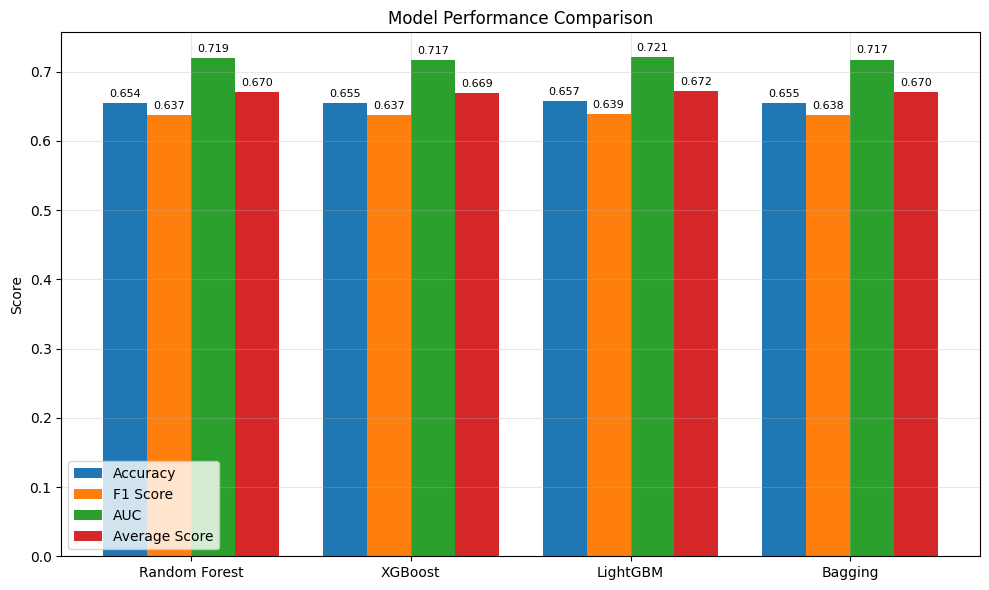

In [39]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
metrics = ["Accuracy", "F1 Score", "AUC", "Average Score"]
x = np.arange(len(models))
width = 0.2

for i, metric in enumerate(metrics):
    offset = (i - 1.5) * width
    bars = ax.bar(x + offset, results_df[metric], width, label=metric)

    # 값 표시
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=8)

ax.set_ylabel('Score')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(results_df["Model"])
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


# best model ?

In [45]:
# bagging은 feature_importances_를 제공하지 않음
hasattr(bag_grid.best_estimator_, 'feature_importances_')

False


최고 성능 모델: LightGBM
최고 Average Score: 0.672340


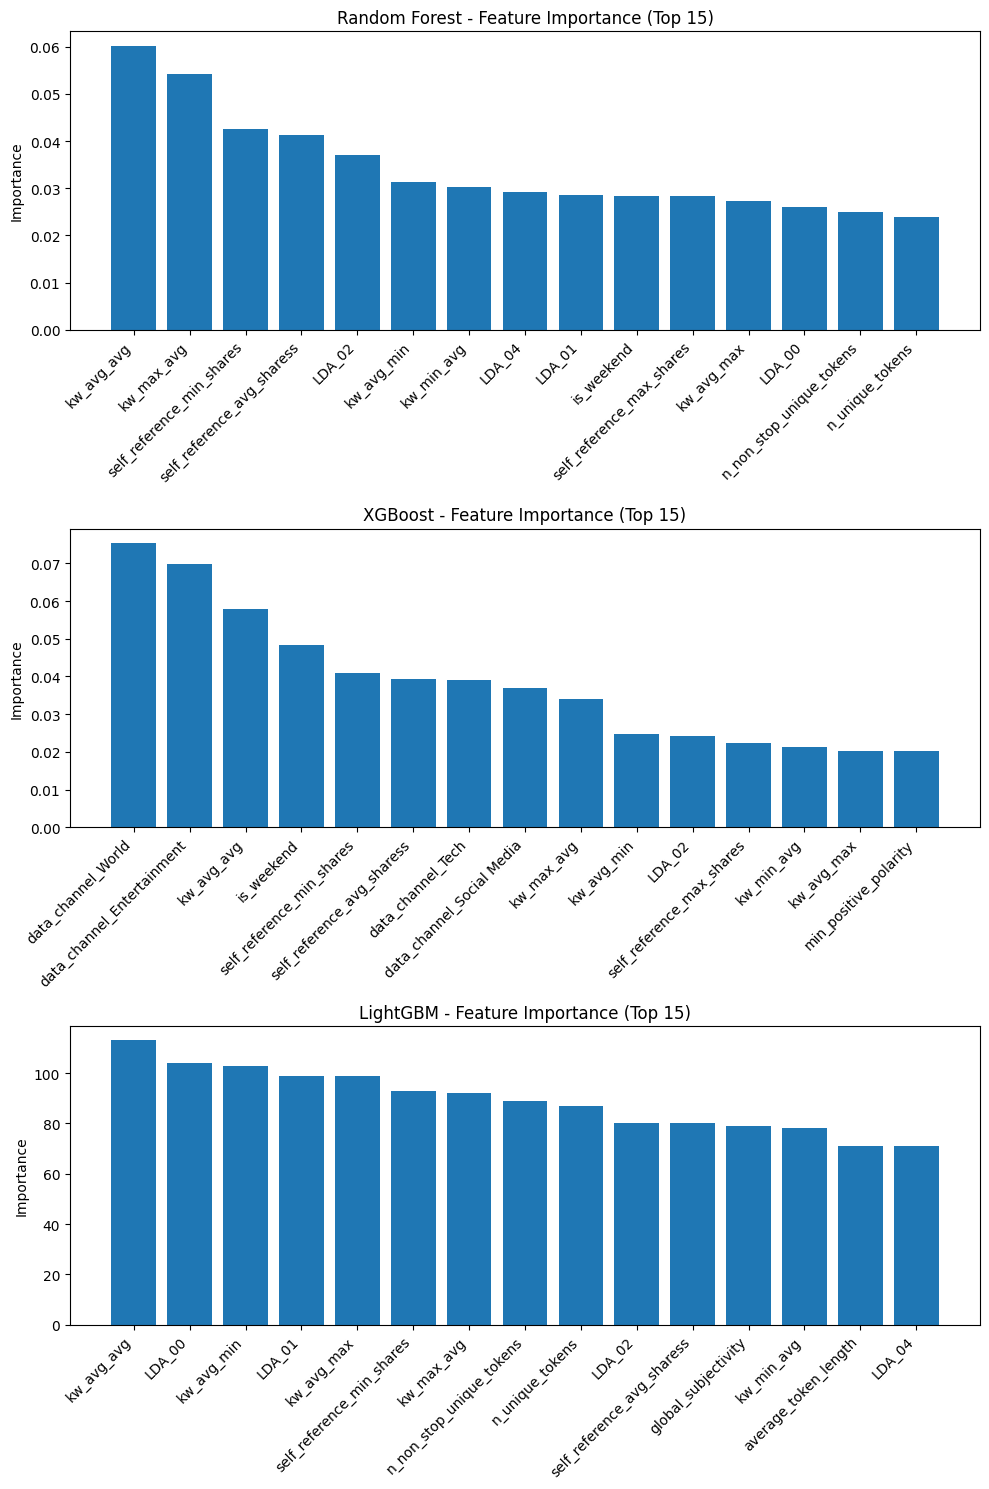

In [40]:
best_model_name = results_df.loc[results_df["Average Score"].idxmax(), "Model"]
best_score = results_df["Average Score"].max()

print(f"\n최고 성능 모델: {best_model_name}")
print(f"최고 Average Score: {best_score:.6f}")

# 특성 중요도 시각화 (모든 모델에 대해)
fig, axes = plt.subplots(3, 1, figsize=(10, 15))
feature_names = X.columns

for idx, (name, model) in enumerate(models.items()):
    if hasattr(model.best_estimator_, 'feature_importances_'):
        importances = model.best_estimator_.feature_importances_
        indices = np.argsort(importances)[::-1][:15]  # 상위 15개 특성

        axes[idx].bar(range(len(indices)), importances[indices])
        axes[idx].set_xticks(range(len(indices)))
        axes[idx].set_xticklabels([feature_names[i] for i in indices], rotation=45, ha='right')
        axes[idx].set_title(f'{name} - Feature Importance (Top 15)')
        axes[idx].set_ylabel('Importance')

plt.tight_layout()
plt.show()

# ensemble
## hard voting

In [55]:
# bag_grid.best_params_에서 base model에 대한 파라미터 분리
print(bag_grid.best_params_)
bag_base_best_params = {k.split('__',1)[1]:v for k,v in bag_grid.best_params_.items() if k.startswith('estimator__')}
bag_best_params   = {k:v for k,v in bag_grid.best_params_.items() if not k.startswith('estimator__')}
print(bag_base_best_params, bag_best_params)

bag_base_best_model = DecisionTreeClassifier(**bag_base_best_params)

{'estimator__max_depth': 15, 'max_features': 0.8, 'n_estimators': 200}
{'max_depth': 15} {'max_features': 0.8, 'n_estimators': 200}


In [56]:
from sklearn.ensemble import VotingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
import numpy as np

# 1. Voting Classifier (Hard Voting)
print("\n" + "=" * 50)
print("Voting Classifier (Hard Voting) 학습 중...")
print("=" * 50)

# 최적 파라미터로 각 모델 생성
rf_final = RandomForestClassifier(**rf_grid.best_params_, random_state=42, n_jobs=-1)
xgb_final = xgb.XGBClassifier(**xgb_grid.best_params_, random_state=42, use_label_encoder=False, eval_metric='logloss', n_jobs=-1)
lgb_final = lgb.LGBMClassifier(**lgb_grid.best_params_, random_state=42, verbose=-1, n_jobs=-1)
bag_final = BaggingClassifier(**bag_best_params, random_state=42, estimator=bag_base_best_model, bootstrap=True, n_jobs=-1)

# Hard Voting
hard_voting_clf = VotingClassifier(
    estimators=[
        ('rf', rf_final),
        ('xgb', xgb_final),
        ('lgb', lgb_final),
        ('bag', bag_final)
    ],
    voting='hard'
)

hard_voting_clf.fit(X_train_scaled, y_train)


Voting Classifier (Hard Voting) 학습 중...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:13:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(max_depth=10,
                                                     max_features='log2',
                                                     n_estimators=200,
                                                     n_jobs=-1,
                                                     random_state=42)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric='loglo...
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=100, n_jobs=-1,
                                            num_parallel_tree=None,
                                            random_state=42, ...)),
                             ('lgb',
                              LGBMClassifier(max_depth=5, n_jobs=-1,
                                             num_leaves=127, random_state=42,
                                             verbose=-1)),
                             ('bag',
                              BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=15),
                                                max_features=0.8,
                                                n_estimators=200, n_jobs=-1,
                                                random_state=42))])

## soft voting

In [57]:
# 2. Voting Classifier (Soft Voting)
print("\n" + "=" * 50)
print("Voting Classifier (Soft Voting) 학습 중...")
print("=" * 50)

soft_voting_clf = VotingClassifier(
    estimators=[
        ('rf', rf_final),
        ('xgb', xgb_final),
        ('lgb', lgb_final),
        ('bag', bag_final)
    ],
    voting='soft'
)

soft_voting_clf.fit(X_train_scaled, y_train)


Voting Classifier (Soft Voting) 학습 중...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:20:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(max_depth=10,
                                                     max_features='log2',
                                                     n_estimators=200,
                                                     n_jobs=-1,
                                                     random_state=42)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric='loglo...
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=100, n_jobs=-1,
                                            num_parallel_tree=None,
                                            random_state=42, ...)),
                             ('lgb',
                              LGBMClassifier(max_depth=5, n_jobs=-1,
                                             num_leaves=127, random_state=42,
                                             verbose=-1)),
                             ('bag',
                              BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=15),
                                                max_features=0.8,
                                                n_estimators=200, n_jobs=-1,
                                                random_state=42))],
                 voting='soft')

## Stacking Classifier

In [59]:
print("\n" + "=" * 50)
print("Stacking Classifier 학습 중...")
print("=" * 50)

# 메타 모델로 로지스틱 회귀 사용
stacking_clf = StackingClassifier(
    estimators=[
        ('rf', rf_final),
        ('xgb', xgb_final),
        ('lgb', lgb_final),
        ('bag', bag_final)
    ],
    final_estimator=LogisticRegression(random_state=42),
    cv=5,
    stack_method='predict_proba'
)

stacking_clf.fit(X_train_scaled, y_train)


Stacking Classifier 학습 중...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:21:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:24:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:24:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:24:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not

StackingClassifier(cv=5,
                   estimators=[('rf',
                                RandomForestClassifier(max_depth=10,
                                                       max_features='log2',
                                                       n_estimators=200,
                                                       n_jobs=-1,
                                                       random_state=42)),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric...
                                              n_estimators=100, n_jobs=-1,
                                              num_parallel_tree=None,
                                              random_state=42, ...)),
                               ('lgb',
                                LGBMClassifier(max_depth=5, n_jobs=-1,
                                               num_leaves=127, random_state=42,
                                               verbose=-1)),
                               ('bag',
                                BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=15),
                                                  max_features=0.8,
                                                  n_estimators=200, n_jobs=-1,
                                                  random_state=42))],
                   final_estimator=LogisticRegression(random_state=42),
                   stack_method='predict_proba')

## Custom Weighted Voting

In [60]:
print("\n" + "=" * 50)
print("Custom Weighted Voting 구현 중...")
print("=" * 50)

# 각 모델을 학습
rf_final.fit(X_train_scaled, y_train)
xgb_final.fit(X_train_scaled, y_train)
lgb_final.fit(X_train_scaled, y_train)
bag_final.fit(X_train_scaled, y_train)

# 가중치 설정 (성능에 비례하여)
# LightGBM > Random Forest > Bagging > XGBoost 순으로 성능이 좋았으므로
weights = {
    'xgb': 0.235,    # 가장 성능이 낮음
    'bag': 0.235,   # 가장 성능이 낮음
    'rf': 0.26,   # 중간 성능
    'lgb': 0.27    # 가장 성능이 좋음
}

def weighted_voting_predict(X, models, weights):
    """가중치를 적용한 소프트 보팅"""
    predictions = []

    # 각 모델의 예측 확률 가져오기
    rf_proba = models['rf'].predict_proba(X)
    xgb_proba = models['xgb'].predict_proba(X)
    lgb_proba = models['lgb'].predict_proba(X)
    bag_proba = models['bag'].predict_proba(X)

    # 가중 평균 계산
    weighted_proba = (
        weights['rf'] * rf_proba +
        weights['xgb'] * xgb_proba +
        weights['lgb'] * lgb_proba +
        weights['bag'] * bag_proba
    )

    # 최종 예측
    final_predictions = np.argmax(weighted_proba, axis=1)

    return final_predictions, weighted_proba


Custom Weighted Voting 구현 중...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:35:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [61]:
# 모든 앙상블 모델 평가
models_to_compare = {
    "Random Forest": rf_final,
    "XGBoost": xgb_final,
    "LightGBM": lgb_final,
    "Bagging": bag_final,
    "Hard Voting": hard_voting_clf,
    "Soft Voting": soft_voting_clf,
    "Stacking": stacking_clf
}

# 결과 저장
ensemble_results = []

for name, model in models_to_compare.items():
    if name == "Custom Weighted":
        # 커스텀 가중 보팅은 별도로 처리
        continue
    else:
        y_pred = model.predict(X_val_scaled)

        # Hard Voting의 경우 predict_proba가 없으므로 별도 처리
        if name == "Hard Voting":
            # AUC 계산을 위해 개별 모델들의 확률값 평균 사용
            rf_proba = rf_final.predict_proba(X_val_scaled)[:, 1]
            xgb_proba = xgb_final.predict_proba(X_val_scaled)[:, 1]
            lgb_proba = lgb_final.predict_proba(X_val_scaled)[:, 1]
            bag_proba = bag_final.predict_proba(X_val_scaled)[:, 1]
            y_pred_proba = (rf_proba + xgb_proba + lgb_proba + bag_proba) / 4
        else:
            y_pred_proba = model.predict_proba(X_val_scaled)[:, 1]

    accuracy = accuracy_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    auc = roc_auc_score(y_val, y_pred_proba)
    avg_score = (accuracy + f1 + auc) / 3

    ensemble_results.append({
        "Model": name,
        "Accuracy": accuracy,
        "F1 Score": f1,
        "AUC": auc,
        "Average Score": avg_score
    })

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

In [62]:
# Custom Weighted Voting 평가
trained_models = {'rf': rf_final, 'xgb': xgb_final, 'lgb': lgb_final, 'bag': bag_final}
y_pred_weighted, y_pred_proba_weighted = weighted_voting_predict(X_val_scaled, trained_models, weights)

accuracy = accuracy_score(y_val, y_pred_weighted)
f1 = f1_score(y_val, y_pred_weighted)
auc = roc_auc_score(y_val, y_pred_proba_weighted[:, 1])
avg_score = (accuracy + f1 + auc) / 3

ensemble_results.append({
    "Model": "Custom Weighted",
    "Accuracy": accuracy,
    "F1 Score": f1,
    "AUC": auc,
    "Average Score": avg_score
})

# 결과 출력
print("\n" + "=" * 50)
print("모든 모델 성능 비교 (앙상블 포함)")
print("=" * 50)

ensemble_df = pd.DataFrame(ensemble_results)
print(ensemble_df.to_string(index=False))


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



모든 모델 성능 비교 (앙상블 포함)
          Model  Accuracy  F1 Score      AUC  Average Score
  Random Forest  0.654412  0.637416 0.719215       0.670347
        XGBoost  0.654871  0.636672 0.716703       0.669415
       LightGBM  0.657169  0.639090 0.720760       0.672340
        Bagging  0.654871  0.637723 0.717326       0.669973
    Hard Voting  0.660386  0.630869 0.724168       0.671808
    Soft Voting  0.659697  0.642874 0.724168       0.675580
       Stacking  0.658778  0.644311 0.723299       0.675463
Custom Weighted  0.659926  0.643202 0.724296       0.675808



개별 모델 평균 성능: 0.670519
앙상블 모델 평균 성능: 0.674665
성능 향상: 0.004146


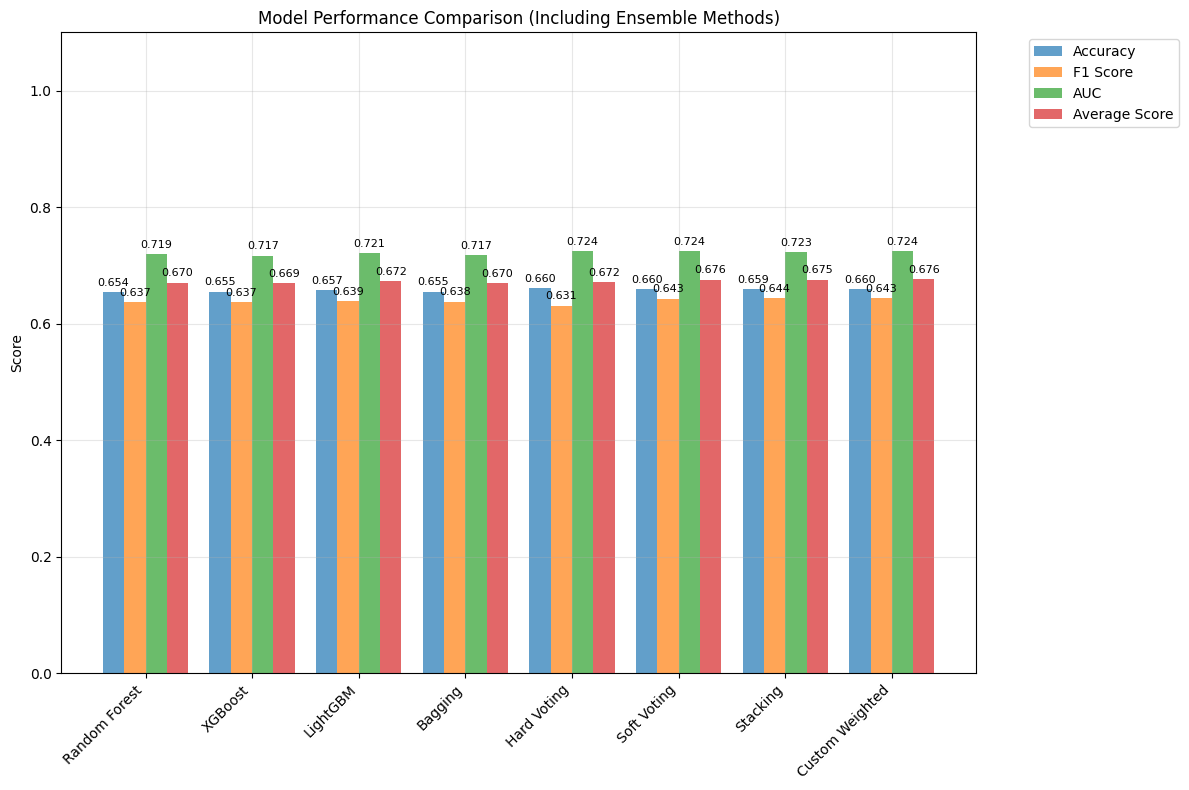

In [64]:
# 성능 향상 분석
base_avg = ensemble_df[ensemble_df["Model"].isin(["Random Forest", "XGBoost", "LightGBM", "Bagging"])]["Average Score"].mean()
ensemble_avg = ensemble_df[ensemble_df["Model"].isin(["Hard Voting", "Soft Voting", "Stacking", "Custom Weighted"])]["Average Score"].mean()

print(f"\n개별 모델 평균 성능: {base_avg:.6f}")
print(f"앙상블 모델 평균 성능: {ensemble_avg:.6f}")
print(f"성능 향상: {ensemble_avg - base_avg:.6f}")

# 시각화
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
metrics = ["Accuracy", "F1 Score", "AUC", "Average Score"]
x = np.arange(len(ensemble_results))
width = 0.2

colors = ['lightblue', 'lightgreen', 'lightcoral', 'gold', 'lightpink', 'lightgray', 'lightsalmon']

for i, metric in enumerate(metrics):
    offset = (i - 1.5) * width
    bars = ax.bar(x + offset, ensemble_df[metric], width, label=metric, alpha=0.7)

    # 값 표시
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=8)

ax.set_ylabel('Score')
ax.set_title('Model Performance Comparison (Including Ensemble Methods)')
ax.set_xticks(x)
ax.set_xticklabels(ensemble_df["Model"], rotation=45, ha='right')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(True, alpha=0.3)
ax.set_ylim(0, 1.1)

plt.tight_layout()
plt.show()

In [65]:
# 최고 성능 모델 선택
best_model_idx = ensemble_df["Average Score"].idxmax()
best_model_name = ensemble_df.loc[best_model_idx, "Model"]
best_score = ensemble_df.loc[best_model_idx, "Average Score"]

print(f"\n최고 성능 모델: {best_model_name}")
print(f"최고 Average Score: {best_score:.6f}")

# 최고 성능 모델이 앙상블 모델인 경우, 해당 모델을 최종 모델로 선택
if best_model_name == "Hard Voting":
    final_model = hard_voting_clf
elif best_model_name == "Soft Voting":
    final_model = soft_voting_clf
elif best_model_name == "Stacking":
    final_model = stacking_clf
elif best_model_name == "Custom Weighted":
    # Custom Weighted는 함수로 구현되어 있음
    final_model = "custom_weighted"
    print("Custom Weighted Voting이 최고 성능 모델입니다.")
    print("weighted_voting_predict 함수를 사용하여 예측하세요.")
else:
    final_model = models_to_compare[best_model_name]

# 앙상블 방법 설명
print("\n" + "=" * 50)
print("앙상블 방법 설명")
print("=" * 50)
print("1. Hard Voting: 다수결로 최종 클래스 결정")
print("2. Soft Voting: 각 모델의 확률값 평균으로 최종 클래스 결정")
print("3. Stacking: 기본 모델들의 예측을 메타 모델(로지스틱 회귀)의 입력으로 사용")
print("4. Custom Weighted: 각 모델의 성능에 비례한 가중치로 예측 확률 결합")


최고 성능 모델: Custom Weighted
최고 Average Score: 0.675808
Custom Weighted Voting이 최고 성능 모델입니다.
weighted_voting_predict 함수를 사용하여 예측하세요.

앙상블 방법 설명
1. Hard Voting: 다수결로 최종 클래스 결정
2. Soft Voting: 각 모델의 확률값 평균으로 최종 클래스 결정
3. Stacking: 기본 모델들의 예측을 메타 모델(로지스틱 회귀)의 입력으로 사용
4. Custom Weighted: 각 모델의 성능에 비례한 가중치로 예측 확률 결합
